# データの準備

In [22]:
import pandas as pd

# データの読み込み
df_wrime = pd.read_table('wrime-ver1.tsv')
df_wrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sentence                   43200 non-null  object
 1   UserID                     43200 non-null  int64 
 2   Datetime                   43200 non-null  object
 3   Train/Dev/Test             43200 non-null  object
 4   Writer_Joy                 43200 non-null  int64 
 5   Writer_Sadness             43200 non-null  int64 
 6   Writer_Anticipation        43200 non-null  int64 
 7   Writer_Surprise            43200 non-null  int64 
 8   Writer_Anger               43200 non-null  int64 
 9   Writer_Fear                43200 non-null  int64 
 10  Writer_Disgust             43200 non-null  int64 
 11  Writer_Trust               43200 non-null  int64 
 12  Reader1_Joy                43200 non-null  int64 
 13  Reader1_Sadness            43200 non-null  int64 
 14  Reader

In [23]:
# Plutchikの8つの基本感情
emotion_names = ['Joy', 'Sadness', 'Anticipation', 'Surprise', 'Anger', 'Fear', 'Disgust', 'Trust']

# 客観感情の平均（"Avg. Readers_*"） の値をlist化し、新しい列として定義する
df_wrime['readers_emotion_intensities'] = df_wrime.apply(lambda x: [x['Avg. Readers_' + name] for name in emotion_names], axis=1)

In [24]:
# 感情強度が低いサンプルは除外する
# (readers_emotion_intensities の max が２以上のサンプルのみを対象とする)
is_target = df_wrime['readers_emotion_intensities'].map(lambda x: max(x) >= 2)
df_wrime_target = df_wrime[is_target]
# index を振り直す
df_wrime_target = df_wrime_target.reset_index(drop=True)

In [25]:
df_wrime_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18237 entries, 0 to 18236
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sentence                     18237 non-null  object
 1   UserID                       18237 non-null  int64 
 2   Datetime                     18237 non-null  object
 3   Train/Dev/Test               18237 non-null  object
 4   Writer_Joy                   18237 non-null  int64 
 5   Writer_Sadness               18237 non-null  int64 
 6   Writer_Anticipation          18237 non-null  int64 
 7   Writer_Surprise              18237 non-null  int64 
 8   Writer_Anger                 18237 non-null  int64 
 9   Writer_Fear                  18237 non-null  int64 
 10  Writer_Disgust               18237 non-null  int64 
 11  Writer_Trust                 18237 non-null  int64 
 12  Reader1_Joy                  18237 non-null  int64 
 13  Reader1_Sadness              18

In [26]:
# リスト化
sentences = df_wrime_target['Sentence'].tolist()

In [27]:
# 「\n」を「」に置換する
sentences = [sentence.replace('\\n', ' ') for sentence in sentences]
# 「x000D」を「」に置換する
sentences = [sentence.replace('x000D', ' ') for sentence in sentences]

In [28]:
# df_wrime_target['readers_emotion_intensities'].map(lambda x: x[0]==3)がTrue かつ 他の感情の強度が0のものを抽出する
# つまり、Joyの強度が3のもののみを抽出する
is_target_joy = df_wrime_target['readers_emotion_intensities'].map(lambda x: x[0]==3) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[1:]==[0,0,0,0,0,0,0])
# Sadnessの強度が3のもののみを抽出する
is_target_sadness = df_wrime_target['readers_emotion_intensities'].map(lambda x: x[1]==3) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[0]==0) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[2:]==[0,0,0,0,0,0])
# Anticipationの強度が3のもののみを抽出する
is_target_anticipation = df_wrime_target['readers_emotion_intensities'].map(lambda x: x[2]==3) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[:2]==[0,0]) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[3:]==[0,0,0,0,0])
# Surpriseの強度が3のもののみを抽出する
is_target_surprise = df_wrime_target['readers_emotion_intensities'].map(lambda x: x[3]==3) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[:3]==[0,0,0]) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[4:]==[0,0,0,0])
# Angerの強度が3のもののみを抽出する
is_target_anger = df_wrime_target['readers_emotion_intensities'].map(lambda x: x[4]==3) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[:4]==[0,0,0,0]) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[5:]==[0,0,0])
# Fearの強度が3のもののみを抽出する
is_target_fear = df_wrime_target['readers_emotion_intensities'].map(lambda x: x[5]==3) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[:5]==[0,0,0,0,0]) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[6:]==[0,0])
# Disgustの強度が3のもののみを抽出する
is_target_disgust = df_wrime_target['readers_emotion_intensities'].map(lambda x: x[6]==3) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[:6]==[0,0,0,0,0,0]) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[7:]==[0])
# Trustの強度が3のもののみを抽出する
is_target_trust = df_wrime_target['readers_emotion_intensities'].map(lambda x: x[7]==3) & df_wrime_target['readers_emotion_intensities'].map(lambda x: x[:7]==[0,0,0,0,0,0,0])

In [29]:
df_wrime_target[is_target_joy].index

Index([   32,   107,   257,   292,  1056,  1059,  1107,  1109,  1112,  1116,
       ...
       15459, 15638, 15767, 15982, 16018, 16494, 16782, 17140, 17825, 18156],
      dtype='int64', length=210)

# つぶやき分散表現

## モデル

In [30]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 使用するモデルを指定して、トークナイザとモデルを読み込む
checkpoint = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
# model = AutoModelForSequenceClassification.from_pretrained("trained_model_deleted_n_3", output_hidden_states=True) # output_hidden_states=Trueで分散表現を取得する
model = AutoModelForSequenceClassification.from_pretrained("trained_model", output_hidden_states=True) # output_hidden_states=Trueで分散表現を取得する

## 分散表現を取得

In [31]:
from torch.utils.data import DataLoader

# 入力文章をトークン化する関数
def tokenize(text):
    return tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")

# データローダーを作成する
batch_size = 64
dataloader = DataLoader(sentences, batch_size=batch_size, collate_fn=tokenize)

# モデルをGPUに移動する
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# バッチ処理で分散表現を取得する
embeddings = []
with torch.no_grad():
    for batch in dataloader:
        # バッチをGPUに移動する
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        hidden_states = outputs.hidden_states
        embeddings.append(hidden_states[-1][:, 0]) # 最後の層のCLSトークンのみ取得する

embeddings = torch.cat(embeddings)

# in 1min


In [32]:
# pandasのDataFrameに変換する
df_embeddings = pd.DataFrame(embeddings.tolist())

df_embeddings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18237 entries, 0 to 18236
Columns: 768 entries, 0 to 767
dtypes: float64(768)
memory usage: 106.9 MB


In [33]:
# 保存する
import os
os.makedirs("embeddings")
df_embeddings.to_csv('embeddings/fine-tuned_embeddings.tsv', sep='\t', index=False, header=False)

In [34]:
# 読み込み
df_embeddings = pd.read_table('embeddings/fine-tuned_embeddings.tsv', header=None)
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.740119,-0.453439,-2.298593,-0.011812,-0.681045,0.293019,0.224431,-0.033002,0.161037,0.229086,...,2.087976,-0.010594,0.136510,-0.975896,-0.414717,-0.712816,1.303346,0.200925,0.132568,-0.842896
1,-0.064806,-0.838125,-0.125091,-0.303156,-1.216663,0.317205,-1.123940,0.043622,0.459775,-0.345027,...,0.566220,-0.460448,1.231317,-1.395990,-0.520606,-1.395722,-0.561407,0.317203,-0.514075,-1.045705
2,-0.177205,-0.038475,0.004524,-0.134732,-0.694878,1.017957,-0.264884,-0.700951,0.223989,-0.690051,...,0.063730,-0.432221,2.140126,-1.533460,-1.448009,-0.816879,-0.784265,0.375309,-0.268075,-0.932579
3,-0.390699,0.478629,-1.255686,-1.048433,-1.489448,0.160583,-1.057427,0.111893,1.027766,-0.462589,...,0.940941,1.351064,1.401423,-1.559869,-0.220055,-0.505495,0.866362,0.157697,-0.204611,-0.909023
4,-0.554775,0.405128,-0.061050,-0.930451,-1.328116,0.482880,-0.959851,0.296494,0.637058,-0.822376,...,0.036903,0.564367,1.582317,-1.578103,-0.720450,-0.787257,0.139028,0.208407,0.135034,-1.032414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,-0.360049,-0.050720,-0.233189,-0.575998,-1.141507,1.079726,-0.626190,0.449266,0.821791,-0.797956,...,-0.409715,0.648500,1.521482,-1.258317,-0.704902,-1.626615,-0.247042,0.544570,-0.461165,-0.776521
18233,-0.188072,-0.139338,-0.406802,-0.821171,-1.200400,0.358000,-1.050031,0.281853,0.874817,-1.029591,...,-0.121493,1.167242,1.355876,-1.398807,-0.694349,-0.829554,-0.387810,0.527563,-0.421062,-1.387648
18234,-0.272053,-1.068314,-0.061710,-0.507885,-0.978020,1.685332,-0.476945,-0.511098,0.562745,-0.119195,...,-0.205380,-0.739280,1.580865,-1.014199,-1.247437,-1.697655,-0.981093,0.530587,-0.789723,-1.303576
18235,-0.616576,0.331484,-0.389922,-1.048230,-1.161616,0.644158,-1.116537,0.567718,0.669060,-0.910402,...,0.134529,1.668865,1.629741,-1.697961,-0.022067,-0.342579,0.381834,0.460834,-0.332405,-1.154416


### 正規化してもあまり変わらない

In [35]:
# # df_embeddingsの標準化
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(df_embeddings)
# df_embeddings = scaler.transform(df_embeddings)

# # pandasのDataFrameに変換する
# df_embeddings = pd.DataFrame(df_embeddings)

# df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.740119,-0.453439,-2.298593,-0.011812,-0.681045,0.293019,0.224431,-0.033002,0.161037,0.229086,...,2.087976,-0.010594,0.136510,-0.975896,-0.414717,-0.712816,1.303346,0.200925,0.132568,-0.842896
1,-0.064806,-0.838125,-0.125091,-0.303156,-1.216663,0.317205,-1.123940,0.043622,0.459775,-0.345027,...,0.566220,-0.460448,1.231317,-1.395990,-0.520606,-1.395722,-0.561407,0.317203,-0.514075,-1.045705
2,-0.177205,-0.038475,0.004524,-0.134732,-0.694878,1.017957,-0.264884,-0.700951,0.223989,-0.690051,...,0.063730,-0.432221,2.140126,-1.533460,-1.448009,-0.816879,-0.784265,0.375309,-0.268075,-0.932579
3,-0.390699,0.478629,-1.255686,-1.048433,-1.489448,0.160583,-1.057427,0.111893,1.027766,-0.462589,...,0.940941,1.351064,1.401423,-1.559869,-0.220055,-0.505495,0.866362,0.157697,-0.204611,-0.909023
4,-0.554775,0.405128,-0.061050,-0.930451,-1.328116,0.482880,-0.959851,0.296494,0.637058,-0.822376,...,0.036903,0.564367,1.582317,-1.578103,-0.720450,-0.787257,0.139028,0.208407,0.135034,-1.032414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,-0.360049,-0.050720,-0.233189,-0.575998,-1.141507,1.079726,-0.626190,0.449266,0.821791,-0.797956,...,-0.409715,0.648500,1.521482,-1.258317,-0.704902,-1.626615,-0.247042,0.544570,-0.461165,-0.776521
18233,-0.188072,-0.139338,-0.406802,-0.821171,-1.200400,0.358000,-1.050031,0.281853,0.874817,-1.029591,...,-0.121493,1.167242,1.355876,-1.398807,-0.694349,-0.829554,-0.387810,0.527563,-0.421062,-1.387648
18234,-0.272053,-1.068314,-0.061710,-0.507885,-0.978020,1.685332,-0.476945,-0.511098,0.562745,-0.119195,...,-0.205380,-0.739280,1.580865,-1.014199,-1.247437,-1.697655,-0.981093,0.530587,-0.789723,-1.303576
18235,-0.616576,0.331484,-0.389922,-1.048230,-1.161616,0.644158,-1.116537,0.567718,0.669060,-0.910402,...,0.134529,1.668865,1.629741,-1.697961,-0.022067,-0.342579,0.381834,0.460834,-0.332405,-1.154416


### 文章間の類似度

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# target_indexの文章と類似度の高い文章を表示する
target_index = 5935

df_wrime_target['similarity'] = cosine_similarity(df_embeddings[target_index:target_index+1], df_embeddings)[0]
best3_similarity_sentence = df_wrime_target.sort_values('similarity', ascending=False)[['Sentence', 'similarity']].head(4)
worst3_similarity_sentence = df_wrime_target.sort_values('similarity', ascending=True)[['Sentence', 'similarity']].head(3)

for i, row in best3_similarity_sentence.iterrows():
    print(f'index: {i}')
    print(f'文　章：{row["Sentence"]}')
    print(f'類似度：{row["similarity"]}')
    print('---')

for i, row in worst3_similarity_sentence.iterrows():
    print(f'index: {i}')
    print(f'文　章：{row["Sentence"]}')
    print(f'類似度：{row["similarity"]}')
    print('---')

index: 5935
文　章：コナン面白かった！アニオリの中ではここ最近で一番面白いと感じました♪
類似度：1.0000000000000018
---
index: 5545
文　章：ドクターX面白かった！初期のシリーズから見てるけど、安定のクオリティですね。
類似度：0.990651412965681
---
index: 5665
文　章：今回もクレヨンしんちゃんは面白かった。まさおくんイイネ♪
類似度：0.9892764866474021
---
index: 5755
文　章：録画したコナンを見ました。蘭可愛かったですね～♪新一は生意気(笑)
類似度：0.9892032615699939
---
index: 4278
文　章：この世から花粉がなくなってほしい
類似度：-0.011251311942887324
---
index: 2355
文　章：北陸新幹線建設のファンドとかあったら普通に買いたいんだけど、そういったファンドは売ってないのだろうか？\n\nもし予算だけの問題ならいくらか協力したいと思ってるのに。。
類似度：-0.005963127064381445
---
index: 11081
文　章：タバコ吸ってるやつ全員死んでほしい
類似度：0.0019311673447717321
---


---

# クラスタリング

In [37]:
from sklearn.cluster import KMeans

# クラスタリング

# k: クラスター数 (optional)
k = 6

# k-means法の実行
kmeansModel = KMeans(n_clusters=k, random_state=0).fit(df_embeddings)

# 各サンプルのクラスター番号を取得する
clusters = kmeansModel.labels_
# clustersに1を足すことで、クラスター番号を1から始める
clusters = clusters + 1

/home/om/.miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


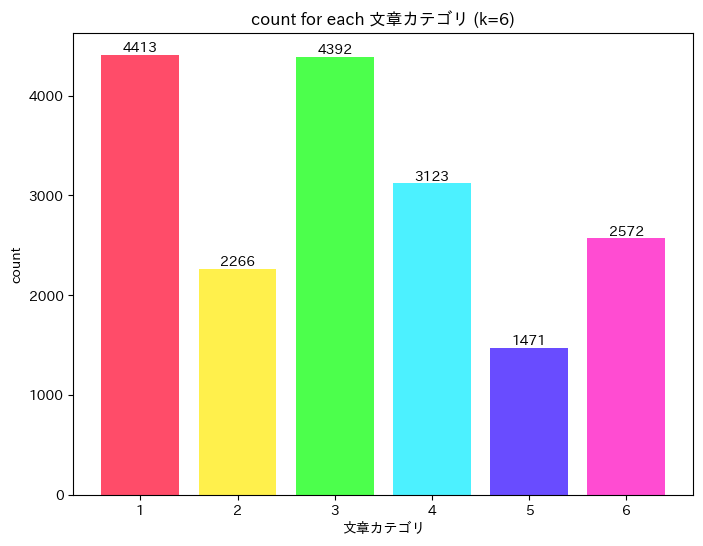

In [38]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager
import numpy as np

# 日本語フォントの設定
font_manager.fontManager.addfont('fonts/ipaexg.ttf')
matplotlib.rc('font', family="IPAexGothic")

# 各クラスの度数を計算
unique_clusters, counts = np.unique(clusters, return_counts=True)

# カラーマップを取得
cmap_name = 'gist_rainbow'
cmap = plt.get_cmap(cmap_name)
colors = cmap(np.linspace(0, 1, len(unique_clusters)))

# 可視化
plt.figure(figsize=(8, 6))
bars = plt.bar(unique_clusters, counts, color=colors, alpha=0.7)
plt.xlabel('文章カテゴリ')
plt.ylabel('count')
plt.title(f'count for each 文章カテゴリ (k={k})')
plt.xticks(unique_clusters)

# テキストを表示
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

## クラスター数の決定

In [39]:
k_max=40

### エルボー法による最適クラスター数の調査
エルボー法では、SSE値(残差平方和)が急激に減少している部分において、SSE値が最も小さい点が最適なクラスター数であると判断する

In [40]:
# from sklearn.cluster import KMeans

# # Survey of optimal number of clusters by Elbow Method
# SSE = []
# for i in range(2, k_max):
#     kmeans_model = KMeans(n_clusters=i, random_state=0).fit(df_embeddings)
#     SSE.append(kmeans_model.inertia_)

# # 可視化
# plt.figure(figsize=(8, 6))
# plt.plot(range(2, k_max), SSE, marker='o', markersize=3)
# plt.xlabel('k')
# plt.xticks(np.arange(2, k_max, 1), fontsize=8)
# plt.ylabel('SSE')
# plt.title('Survey of optimal number of clusters by Elbow Method')
# plt.grid(True)
# plt.show()

### シルエット係数による最適クラスター数の調査

In [41]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Survey of optimal number of clusters by Silhouette Coefficient
# silhouette_coefficients = []
# for i in range(2, k_max):
#     kmeans_model = KMeans(n_clusters=i, random_state=0).fit(df_embeddings)
#     silhouette_coefficient = silhouette_score(df_embeddings, kmeans_model.labels_) # シルエット係数の平均値
#     silhouette_coefficients.append(silhouette_coefficient)


# # 可視化
# plt.figure(figsize=(8, 6))
# plt.plot(range(2, k_max), silhouette_coefficients, marker='o', markersize=3)
# plt.xlabel('k')
# plt.xticks(np.arange(2, k_max, 1), fontsize=8)
# plt.ylabel('Silhouette Coefficient')
# plt.title('Survey of optimal number of clusters by Silhouette Coefficient')
# plt.grid(True)
# plt.show()

### シルエット図

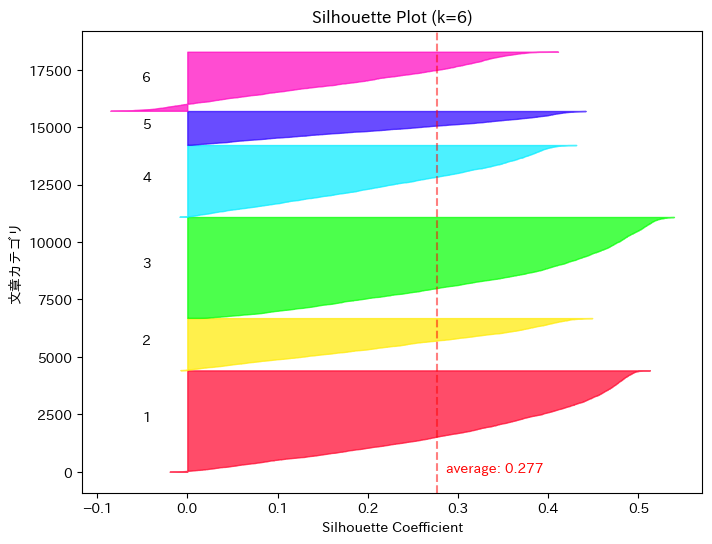

In [42]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm


# データセット全体の平均シルエット係数を計算
silhouette_avg = silhouette_score(df_embeddings, clusters)

# 各サンプルのシルエット係数を計算
silhouette_values = silhouette_samples(df_embeddings, clusters)

# 可視化
plt.figure(figsize=(8, 6))
y_lower = 0
for i, cluster in enumerate(unique_clusters):
    cluster_silhouette_values = silhouette_values[clusters == cluster]
    cluster_silhouette_values.sort()
    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i+1))
    y_lower = y_upper + 10

# 平均シルエット係数を直線で表示
plt.axvline(x=silhouette_avg, color="red", linestyle="--", alpha=0.5)
plt.text(silhouette_avg + 0.01, -20, f"average: {silhouette_avg:.3f}", color="red")

plt.xlabel('Silhouette Coefficient')
plt.ylabel('文章カテゴリ')
plt.title(f'Silhouette Plot (k={k})')
plt.show()

In [43]:
clusters

array([4, 3, 3, ..., 3, 1, 3], dtype=int32)

In [44]:
# 各文章カテゴリのシルエット係数が最も高い文章を表示
for i, cluster in enumerate(unique_clusters):
    cluster_silhouette_values = silhouette_values[clusters == cluster]
    cluster_silhouette_values.sort()
    index = np.where(silhouette_values == cluster_silhouette_values[-1])[0][0]
    print(f'文章カテゴリ: {clusters[index]}')
    print(f'シルエット係数が最も高い文章: {df_wrime_target.iloc[index, 0]}')
    print(f'文章のindex: {index}')
    print(f'シルエット係数: {cluster_silhouette_values[-1]:.3f}')
    print('---')

文章カテゴリ: 1
シルエット係数が最も高い文章: 冬のボーナス(もらえれば)でイカセット買いたい思てるからはよ品薄解消すればえーなぁ
文章のindex: 2222
シルエット係数: 0.513
---
文章カテゴリ: 2
シルエット係数が最も高い文章: たかが数日(2?3日)も働けねえでバックレるとは何事\nしかも10人中2人もw\n\n学生同士 友達同士で応募してるんだろうけど\nバックれないように切磋琢磨しあえよな..\nあと1日だしがんばろうぜ、乗り切ってうまいもんでも食って帰ろうぜ\nって\n\nバックれは交通費でないので多分赤字\nアホくさすぎるw
文章のindex: 9114
シルエット係数: 0.449
---
文章カテゴリ: 3
シルエット係数が最も高い文章: シナリオ講座行って、\n帰りにネイルをお直し。\nLIMで作ってもらう爪はいつもとってもかわいい。しかも今回担当してくれたお姉さんが可愛くて眼福すぎた。\n思わず指名変更しちゃった。。
文章のindex: 16542
シルエット係数: 0.539
---
文章カテゴリ: 4
シルエット係数が最も高い文章: 好きなひと久々に見かけたのに照れが生じたのかタイミング逃したのか挨拶出来なかった、笑顔でにこっと挨拶したかった。。空も曇りだ。。
文章のindex: 16436
シルエット係数: 0.431
---
文章カテゴリ: 5
シルエット係数が最も高い文章: 痴漢冤罪の映画を見てから、ちょっとでも混んでる電車が恐怖でしょうがない。
文章のindex: 7324
シルエット係数: 0.441
---
文章カテゴリ: 6
シルエット係数が最も高い文章: 日経先物　+2.83%\nダウ　+3.19%\n\nめちゃ上がってるやんけ！
文章のindex: 17627
シルエット係数: 0.411
---


In [45]:
range(len(df_wrime_target[is_target_sadness]))

range(0, 90)

In [46]:
print(f'only Joy: {len(df_wrime_target[is_target_joy])}, only Sadness: {len(df_wrime_target[is_target_sadness])}, only Anticipation: {len(df_wrime_target[is_target_anticipation])}, only Surprise: {len(df_wrime_target[is_target_surprise])}, only Anger: {len(df_wrime_target[is_target_anger])}, only Fear: {len(df_wrime_target[is_target_fear])}, only Disgust: {len(df_wrime_target[is_target_disgust])}, only Trust: {len(df_wrime_target[is_target_trust])}')

only Joy: 210, only Sadness: 90, only Anticipation: 234, only Surprise: 124, only Anger: 3, only Fear: 36, only Disgust: 11, only Trust: 0


In [47]:
# import itertools

# emotion_flags = [is_target_joy, is_target_sadness, is_target_anticipation, is_target_surprise, is_target_anger, is_target_fear, is_target_disgust, is_target_trust]

# combinations = list(itertools.combinations(range(len(emotion_flags)), 2))

# for combination in combinations:
#     emotion_flag1 = emotion_flags[combination[0]]
#     emotion_flag2 = emotion_flags[combination[1]]
#     emotion_name1 = emotion_names[combination[0]]
#     emotion_name2 = emotion_names[combination[1]]

#     with open(f'mean_similar/{emotion_name1}_{emotion_name2}.txt', 'w') as file:
#         for s in range(len(df_wrime_target[emotion_flag1])):
#             for t in range(len(df_wrime_target[emotion_flag2])):
#                 mean_vector = (df_embeddings.iloc[df_wrime_target[emotion_flag1].index[s], :] + df_embeddings.iloc[df_wrime_target[emotion_flag2].index[t], :]) / 2
#                 df_mean_vector = pd.DataFrame(mean_vector).T

#                 df_wrime_target['similarity'] = cosine_similarity(df_mean_vector, df_embeddings)[0]
#                 best3_similarity_sentence = df_wrime_target.sort_values('similarity', ascending=False)[['Sentence', 'similarity']].head(10)

#                 file.write('\n')
#                 file.write(f'target sentence 1: {sentences[df_wrime_target[emotion_flag1].index[s]]} {df_wrime_target.loc[df_wrime_target[emotion_flag1].index[s], "readers_emotion_intensities"]}\n')
#                 file.write(f'target sentence 2: {sentences[df_wrime_target[emotion_flag2].index[t]]} {df_wrime_target.loc[df_wrime_target[emotion_flag2].index[t], "readers_emotion_intensities"]}\n')
#                 file.write('---\n')

#                 for i, row in best3_similarity_sentence.iterrows():
#                     file.write(f'sentence: {row["Sentence"]}\n')
#                     file.write(f'intensities: {df_wrime_target.loc[i, "readers_emotion_intensities"]}\n')
#                     file.write(f'similarity: {row["similarity"]}\n')
#                     file.write('---\n')


In [48]:
# 特定の文章カテゴリのシルエット係数が高い上位5件を表示
target_cluster = 4
cluster_silhouette_values = silhouette_values[clusters == target_cluster]
cluster_silhouette_values.sort()
for i in range(5):
    index = np.where(silhouette_values == cluster_silhouette_values[-i - 1])[0][0]
    print(f'文章カテゴリ: {clusters[index]}')
    print(f'シルエット係数が高い文章: {df_wrime_target.iloc[index, 0]}')
    print(f'シルエット係数: {cluster_silhouette_values[-i - 1]:.3f}')
    print('---')

文章カテゴリ: 4
シルエット係数が高い文章: 好きなひと久々に見かけたのに照れが生じたのかタイミング逃したのか挨拶出来なかった、笑顔でにこっと挨拶したかった。。空も曇りだ。。
シルエット係数: 0.431
---
文章カテゴリ: 4
シルエット係数が高い文章: ステージのない学祭、物足りないものじゃ。寂しいのう寒いのう
シルエット係数: 0.428
---
文章カテゴリ: 4
シルエット係数が高い文章: なんか、才能ある人が報われないの辛い
シルエット係数: 0.426
---
文章カテゴリ: 4
シルエット係数が高い文章: 眠いだと…ざわ……ざわ……\n柚葉さんのお祝いできてない…(´；ω；`)
シルエット係数: 0.421
---
文章カテゴリ: 4
シルエット係数が高い文章: 社会人1年目に作った出勤用プレイリストに入ってた曲がことごとく嫌いになってて悲しい。途中から退勤用プレイリスト聞いて出勤してたから気持ち奮い立たせすぎるのもよくないのかもね。
シルエット係数: 0.421
---


## クラスタリング結果の可視化

### PCA

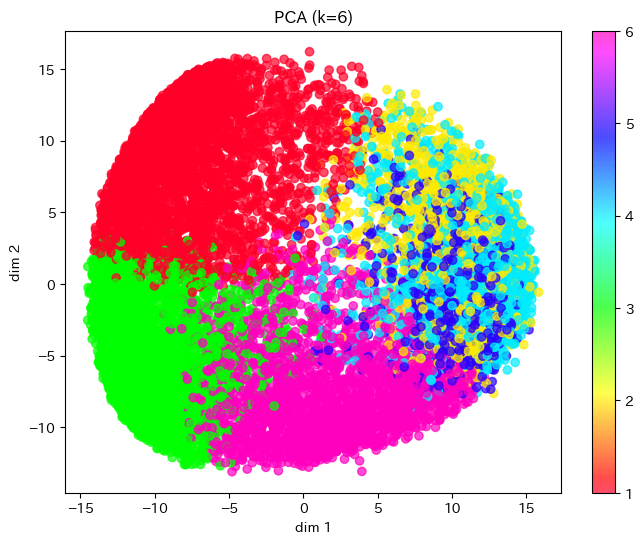

In [49]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
pca.fit(df_embeddings)
df_embeddings_pca = pca.transform(df_embeddings)

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(df_embeddings_pca[:, 0], df_embeddings_pca[:, 1], c=clusters, cmap=cmap_name, alpha=0.7)
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title(f'PCA (k={k})')
plt.colorbar()
plt.show()

### t-SNE

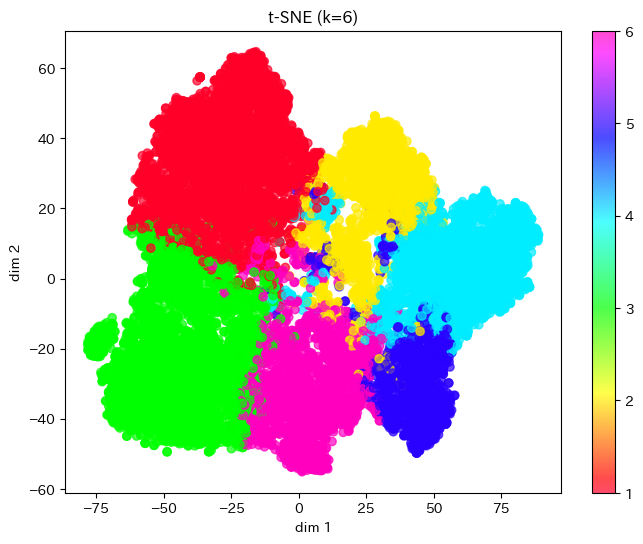

In [50]:
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=50)
df_wrime_features_tsne = tsne.fit_transform(df_embeddings)

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(df_wrime_features_tsne[:, 0], df_wrime_features_tsne[:, 1], c=clusters, cmap=cmap_name, alpha=0.7)
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title(f't-SNE (k={k})')
plt.colorbar()
plt.show()

# in 1min

### UMAP

In [51]:
'''
import umap

# UMAP
umap_obj = umap.UMAP(n_components=2, random_state=0)
df_wrime_features_umap = umap_obj.fit_transform(df_embeddings)

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(df_wrime_features_umap[:, 0], df_wrime_features_umap[:, 1], c=clusters, cmap=cmap_name, alpha=0.7)
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title(f'UMAP (k={k})')
plt.colorbar()
plt.show()
'''

"\nimport umap\n\n# UMAP\numap_obj = umap.UMAP(n_components=2, random_state=0)\ndf_wrime_features_umap = umap_obj.fit_transform(df_embeddings)\n\n# 可視化\nplt.figure(figsize=(8, 6))\nplt.scatter(df_wrime_features_umap[:, 0], df_wrime_features_umap[:, 1], c=clusters, cmap=cmap_name, alpha=0.7)\nplt.xlabel('dim 1')\nplt.ylabel('dim 2')\nplt.title(f'UMAP (k={k})')\nplt.colorbar()\nplt.show()\n"

---

# 感情カテゴリとつぶやき分散表現の関係

In [52]:
# clusters/emotion_6clusters.tsvを読み込み
df_clusters = pd.read_csv('clusters/emotion_6clusters.tsv', sep='\t', header=None)
# 変換
emotion_clusters = df_clusters[0].tolist()
emotion_clusters = [int(x) for x in emotion_clusters]
df_emotion_clusters = pd.DataFrame(emotion_clusters, columns=['labels'])

In [53]:
df_emotion_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18237 entries, 0 to 18236
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   labels  18237 non-null  int64
dtypes: int64(1)
memory usage: 142.6 KB


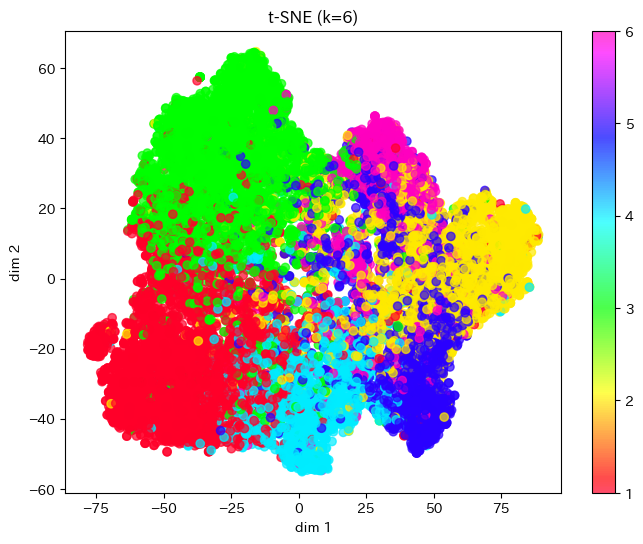

In [54]:
# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(df_wrime_features_tsne[:, 0], df_wrime_features_tsne[:, 1], c=emotion_clusters, cmap=cmap_name, alpha=0.7)
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title(f't-SNE (k={len(set(emotion_clusters))})')
plt.colorbar()
plt.show()

### アノテーション

In [55]:
cluster2emotion = {3:1, 2:4, 4:6, 1:3, 6:5, 5:2}
emotion2cluster = {v:k for k, v in cluster2emotion.items()}

---

### 感情カテゴリを正解ラベルとして、つぶやき分散表現から学習

In [56]:
# df_wrime_target['Train/Dev/Test'], df_embeddings, df_emotion_clustersを結合
df_embeddings_clusters = pd.concat([df_wrime_target['Train/Dev/Test'], df_embeddings, df_emotion_clusters], ignore_index=True, axis=1)
# df_embeddings_clustersの最後の列を1引く
df_embeddings_clusters.iloc[:, -1] = df_embeddings_clusters.iloc[:, -1] - 1

df_embeddings_clusters

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,768,769
0,train,-0.740119,-0.453439,-2.298593,-0.011812,-0.681045,0.293019,0.224431,-0.033002,0.161037,...,-0.010594,0.136510,-0.975896,-0.414717,-0.712816,1.303346,0.200925,0.132568,-0.842896,1
1,train,-0.064806,-0.838125,-0.125091,-0.303156,-1.216663,0.317205,-1.123940,0.043622,0.459775,...,-0.460448,1.231317,-1.395990,-0.520606,-1.395722,-0.561407,0.317203,-0.514075,-1.045705,3
2,train,-0.177205,-0.038475,0.004524,-0.134732,-0.694878,1.017957,-0.264884,-0.700951,0.223989,...,-0.432221,2.140126,-1.533460,-1.448009,-0.816879,-0.784265,0.375309,-0.268075,-0.932579,0
3,train,-0.390699,0.478629,-1.255686,-1.048433,-1.489448,0.160583,-1.057427,0.111893,1.027766,...,1.351064,1.401423,-1.559869,-0.220055,-0.505495,0.866362,0.157697,-0.204611,-0.909023,2
4,train,-0.554775,0.405128,-0.061050,-0.930451,-1.328116,0.482880,-0.959851,0.296494,0.637058,...,0.564367,1.582317,-1.578103,-0.720450,-0.787257,0.139028,0.208407,0.135034,-1.032414,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,train,-0.360049,-0.050720,-0.233189,-0.575998,-1.141507,1.079726,-0.626190,0.449266,0.821791,...,0.648500,1.521482,-1.258317,-0.704902,-1.626615,-0.247042,0.544570,-0.461165,-0.776521,0
18233,train,-0.188072,-0.139338,-0.406802,-0.821171,-1.200400,0.358000,-1.050031,0.281853,0.874817,...,1.167242,1.355876,-1.398807,-0.694349,-0.829554,-0.387810,0.527563,-0.421062,-1.387648,2
18234,train,-0.272053,-1.068314,-0.061710,-0.507885,-0.978020,1.685332,-0.476945,-0.511098,0.562745,...,-0.739280,1.580865,-1.014199,-1.247437,-1.697655,-0.981093,0.530587,-0.789723,-1.303576,0
18235,train,-0.616576,0.331484,-0.389922,-1.048230,-1.161616,0.644158,-1.116537,0.567718,0.669060,...,1.668865,1.629741,-1.697961,-0.022067,-0.342579,0.381834,0.460834,-0.332405,-1.154416,2


In [57]:
# train / test に分割する
df_groups = df_embeddings_clusters.groupby(0)
df_train = df_groups.get_group('train')
df_test = pd.concat([df_groups.get_group('dev'), df_groups.get_group('test')])
print('train :', len(df_train))  # train : 17104
print('test :', len(df_test))    # test : 1133

train : 17104
test : 1133


In [58]:
import xgboost as xgb

# xgboostの入力データを作成
train_data = df_train.drop([0, 769], axis=1).values
train_labels = df_train[769].values

test_data = df_test.drop([0, 769], axis=1).values
test_labels = df_test[769].values

train_data = xgb.DMatrix(train_data, label=train_labels)
test_data = xgb.DMatrix(test_data, label=test_labels)

In [59]:
# モデル
params = {
    'objective': 'multi:softmax',
    'num_class': len(set(emotion_clusters)),
    'eval_metric': 'mlogloss',
    'verbosity': 0,
    'seed': 0,
    'max_depth': 1,
    'eta': 0.1,
}

history = dict()

# 学習
model = xgb.train(params, train_data, evals=[(train_data, 'train'), (test_data, 'test')], evals_result=history, num_boost_round=1000, early_stopping_rounds=10)



[0]	train-mlogloss:1.64948	test-mlogloss:1.65024
[1]	train-mlogloss:1.53541	test-mlogloss:1.53937
[2]	train-mlogloss:1.44045	test-mlogloss:1.44513
[3]	train-mlogloss:1.35988	test-mlogloss:1.36548
[4]	train-mlogloss:1.29029	test-mlogloss:1.29834
[5]	train-mlogloss:1.22945	test-mlogloss:1.23989
[6]	train-mlogloss:1.17555	test-mlogloss:1.18861
[7]	train-mlogloss:1.12766	test-mlogloss:1.14289
[8]	train-mlogloss:1.08497	test-mlogloss:1.10310
[9]	train-mlogloss:1.04653	test-mlogloss:1.06820
[10]	train-mlogloss:1.01191	test-mlogloss:1.03534
[11]	train-mlogloss:0.98069	test-mlogloss:1.00551
[12]	train-mlogloss:0.95233	test-mlogloss:0.97917
[13]	train-mlogloss:0.92655	test-mlogloss:0.95654
[14]	train-mlogloss:0.90307	test-mlogloss:0.93498
[15]	train-mlogloss:0.88157	test-mlogloss:0.91591
[16]	train-mlogloss:0.86201	test-mlogloss:0.89763
[17]	train-mlogloss:0.84415	test-mlogloss:0.88188
[18]	train-mlogloss:0.82777	test-mlogloss:0.86681
[19]	train-mlogloss:0.81270	test-mlogloss:0.85326
[20]	train

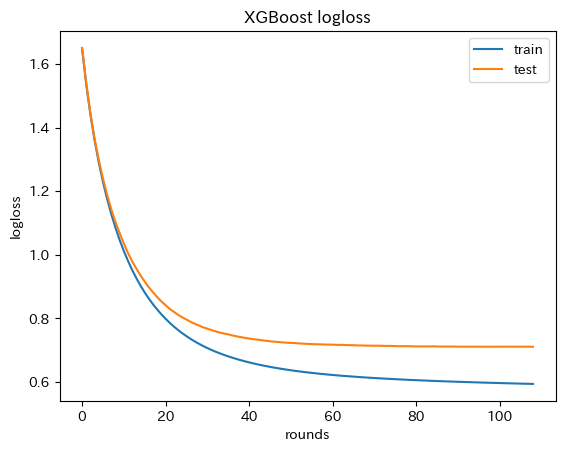

In [60]:
# 予測
preds_labels = model.predict(test_data)

# グラフ描写
plt.plot(history['train']['mlogloss'], label='train')
plt.plot(history['test']['mlogloss'], label='test')
plt.xlabel('rounds')
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.legend()
plt.show()

In [61]:
test_labels += 1
preds_labels += 1

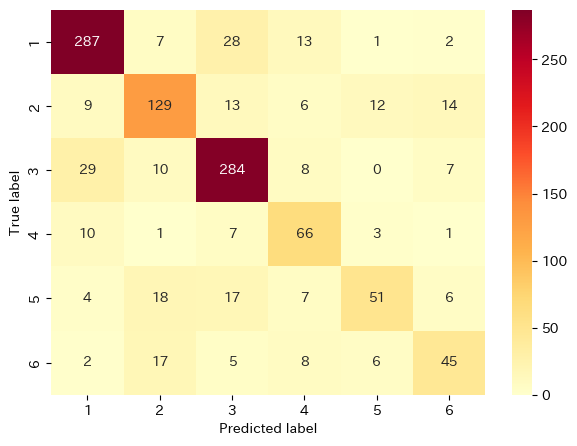

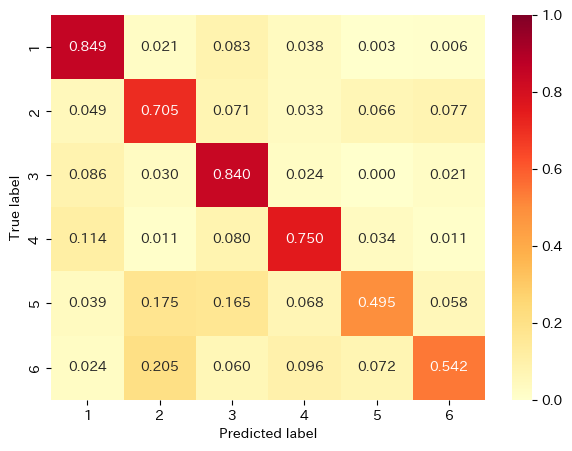

              precision    recall  f1-score   support

           1      0.842     0.849     0.845       338
           2      0.709     0.705     0.707       183
           3      0.802     0.840     0.821       338
           4      0.611     0.750     0.673        88
           5      0.699     0.495     0.580       103
           6      0.600     0.542     0.570        83

    accuracy                          0.761      1133
   macro avg      0.710     0.697     0.699      1133
weighted avg      0.760     0.761     0.758      1133



In [62]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 混同行列の作成
cm = confusion_matrix(test_labels, preds_labels, labels=list(set(emotion_clusters)))

# ヒートマップの描画
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(set(emotion_clusters))) + 0.5, range(1, len(set(emotion_clusters)) + 1))
plt.yticks(np.arange(len(set(emotion_clusters))) + 0.5, range(1, len(set(emotion_clusters)) + 1))
plt.show()

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# ヒートマップの描画
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='.3f', vmin=0, vmax=1)
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(set(emotion_clusters))) + 0.5, range(1, len(set(emotion_clusters)) + 1))
plt.yticks(np.arange(len(set(emotion_clusters))) + 0.5, range(1, len(set(emotion_clusters)) + 1))
plt.ylabel('True label')
plt.show()

# 各クラスの適合率、再現率、F1スコアを算出
print(classification_report(test_labels, preds_labels, digits=3))

In [63]:
# 間違って予測された文章のindexを取得
wrong_preds = np.where(test_labels != preds_labels)[0]

# 間違って予測された文章を5個表示
for i in wrong_preds[10:15]:
    print(df_wrime_target.iloc[i]['Sentence'])
    print('True label:', test_labels[i])
    print('Predicted label:', preds_labels[i])
    print('---')

28歳にして初めて、ガードルなるものを穿きました。すごいなこれ！なんで今まで穿かなかったんだろ。もう、毎日穿きたい。
True label: 2
Predicted label: 1.0
---
焼き肉いきたい。
True label: 2
Predicted label: 5.0
---
仕事納め!がんばろ！
True label: 3
Predicted label: 1.0
---
実家の母は、普段話し相手がいないのか、たまに帰るとむちゃくちゃ喋ってくる。今回、風邪気味で無口だったので、静かな正月となった。二泊三日の最終日、私を送り出す駅のホームで急に喋りだした。え、今？ どうやら風邪は治ったようです。
True label: 5
Predicted label: 2.0
---
今日か明日、えべっさん行きたいな～
True label: 5
Predicted label: 3.0
---


---

### fine-tuned bert 文章カテゴリと感情カテゴリの一致度

In [64]:
df_clusters = pd.DataFrame(clusters, columns=['clusters'])
# df_clusters['clusters']をcluster2emotionを使って変換
df_clusters['clusters'] = df_clusters['clusters'].map(cluster2emotion)

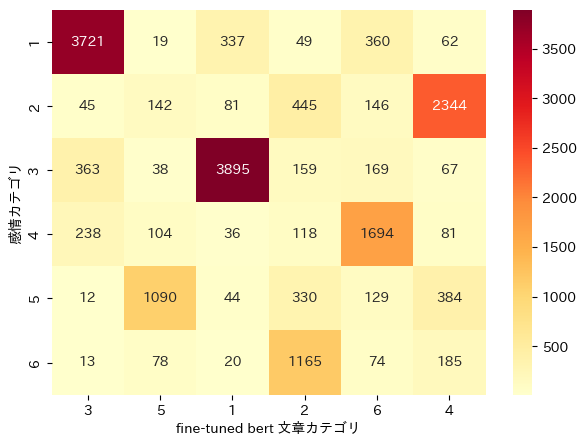

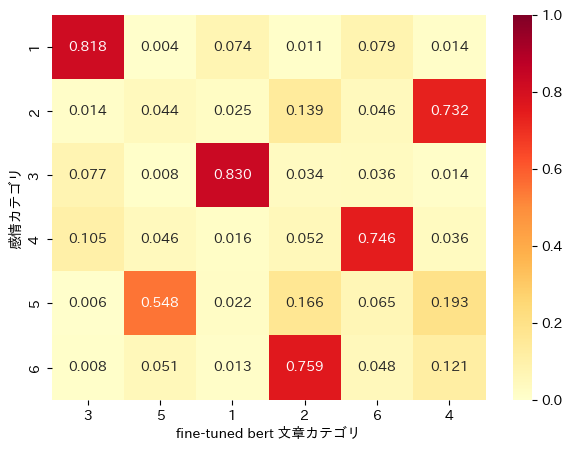

              precision    recall  f1-score   support

           1      0.847     0.818     0.832      4548
           2      0.097     0.044     0.061      3203
           3      0.883     0.830     0.856      4691
           4      0.052     0.052     0.052      2271
           5      0.050     0.065     0.057      1989
           6      0.059     0.121     0.079      1535

    accuracy                          0.449     18237
   macro avg      0.331     0.322     0.323     18237
weighted avg      0.472     0.449     0.458     18237



In [65]:


# fine-tunedのクラスタリングとemotionのクラスタリングの比較
cm = confusion_matrix(df_emotion_clusters['labels'], df_clusters['clusters'], labels=list(set(emotion_clusters)))

# ヒートマップの描画
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='g')
plt.xlabel('fine-tuned bert 文章カテゴリ')
plt.ylabel('感情カテゴリ')
# x軸をcluster2emotionの順番にする
plt.xticks(np.arange(len(set(emotion_clusters))) + 0.5, [emotion2cluster[x] for x in list(range(1, len(set(emotion_clusters)) + 1))])
plt.yticks(np.arange(len(set(emotion_clusters))) + 0.5, range(1, len(set(emotion_clusters)) + 1))
plt.show()

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# ヒートマップの描画
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='.3f', vmin=0, vmax=1)
plt.xlabel('fine-tuned bert 文章カテゴリ')
plt.ylabel('感情カテゴリ')
plt.xticks(np.arange(len(set(emotion_clusters))) + 0.5, [emotion2cluster[x] for x in list(range(1, len(set(emotion_clusters)) + 1))])
plt.yticks(np.arange(len(set(emotion_clusters))) + 0.5, range(1, len(set(emotion_clusters)) + 1))
plt.show()

# 各クラスの適合率、再現率、F1スコアを算出
print(classification_report(df_emotion_clusters['labels'], df_clusters['clusters'], digits=3))